In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import pickle

ModuleNotFoundError: No module named 'wordcloud'

In [26]:
#Loading the datset
# true_df = pd.read_csv(r"C:\Users\Catch\Downloads\Compressed\Fake.csv")
# fake_df = pd.read_csv(r"C:\Users\Catch\Downloads\Compressed\True.csv")
df_news = pd.read_csv(r"C:\Users\Catch\Downloads\Compressed\news_datasets.csv")

In [27]:
# true_df.head()

In [28]:
# fake_df.head()

In [29]:
#Creating 'check' on both dfs that will be the target feature.

# true_df['check'] = 'TRUE'
# fake_df['check'] = 'FAKE'

In [30]:
# true_df.head()

In [31]:
# fake_df.head()

In [32]:
# true_df.describe()

In [33]:
#Combine both datasets

# df_news = pd.concat([true_df, fake_df])

In [34]:
df_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [35]:
df_news.sample(frac = 1)

,Unnamed: 0,title,text,label
4184,729,Bernie Sanders digs in,Washington (CNN) The stakes of Bernie Sanders'...,REAL
3407,7197,What do the protesters believe they are protes...,"written by Admin \nA victory for freedom, just...",FAKE
3346,1525,Donald Trump's year of tweeting dangerously,"Killing Obama administration rules, dismantlin...",REAL
4778,579,Louisiana’s Common Core Debacle,John White may be the silver-tongued boy wonde...,REAL
530,1343,5 takeaways from the Republican debate,"Manchester, New Hampshire (CNN) It was the rev...",REAL
...,...,...,...,...
1137,7526,Dems File Complaint w/DOJ Against FBI for Inve...,Dems File Complaint w/DOJ Against FBI for Inve...,FAKE
1246,8195,The US Elections Do Matter But Not Necessary T...,"By Rixon Stewart on September 12, 2006 \nIs te...",FAKE
844,6830,US Insiders – Not Russia – Leaked Clinton Emails,"Posted on November 2, 2016 by WashingtonsBlog ...",FAKE
704,1005,Ted Cruz victory shows GOP's impossible conund...,"The Wisconsin GOP primary suggests that, no ma...",REAL


In [36]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [37]:
#Shuffling to see some Fake and true

df_news.sample(frac = 1)

,Unnamed: 0,title,text,label
5173,8348,Trump’s Camp Manager DESTROYS Hillary By Point...,Trump’s Camp Manager DESTROYS Hillary By Point...,FAKE
2248,6050,"Team Clinton: Let’s Talk About Russia, Not the...","Washington Free Beacon October 26, 2016 \nHill...",FAKE
4162,7224,Why Is This Not Watergate? Smoking Gun Emails ...,\nThis article was written by Tyler Durden and...,FAKE
1359,5604,Benny Morris’s Untenable Denial of the Ethnic ...,References The Debate \nIt started when Daniel...,FAKE
4427,4081,Thousands march to mourn slain Boris Nemtsov,MOSCOW — Tens of thousands of people marched i...,REAL
...,...,...,...,...
1140,6609,"BREAKING : LGBT Group Endorses Trump, Says, “H...","BREAKING : LGBT Group Endorses Trump, Says, “H...",FAKE
4966,532,Obama to propose ending sequester,"On Day 13, a video message and a meeting with ...",REAL
596,2497,"United States v. Texas, the biggest immigratio...",When it takes up the question of whether Presi...,REAL
3993,7927,FBI Director may be sacked for intrusion into ...,FBI Director may be sacked for intrusion into ...,FAKE


In [38]:
#Searching for null values.

df_news.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [40]:
#We will join title, text and subject to create the article feature

df_news['article'] = df_news['title']+""+df_news['text']+""+['label']

In [41]:
df = df_news[['article','label']]

In [42]:
#Converting to lower case

df['article'] = df['article'].apply(lambda x: x.lower())

<ipython-input-42-07b2a66b433b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['article'] = df['article'].apply(lambda x: x.lower())


In [43]:
df['article'].head()

0    you can smell hillary’s feardaniel greenfield,...
1    watch the exact moment paul ryan committed pol...
2    kerry to go to paris in gesture of sympathyu.s...
3    bernie supporters on twitter erupt in anger ag...
4    the battle of new york: why this primary matte...
Name: article, dtype: object

In [44]:
#Removing Punctuation

import string

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [45]:
df['article'] = df['article'].apply(punctuation_removal)
df['article'].head()

<ipython-input-45-e814a93c2d3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['article'] = df['article'].apply(punctuation_removal)


0    you can smell hillary’s feardaniel greenfield ...
1    watch the exact moment paul ryan committed pol...
2    kerry to go to paris in gesture of sympathyus ...
3    bernie supporters on twitter erupt in anger ag...
4    the battle of new york why this primary matter...
Name: article, dtype: object

In [46]:
#Removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['article'].apply(lambda x: [item for item in x if item not in stop])

0       [u,  , c, n,  , e, l, l,  , h, l, l, r, ’,  , ...
1       [w, c, h,  , h, e,  , e, x, c,  , e, n,  , p, ...
2       [k, e, r, r,  ,  , g,  ,  , p, r,  , n,  , g, ...
3       [b, e, r, n, e,  , u, p, p, r, e, r,  , n,  , ...
4       [h, e,  , b, l, e,  , f,  , n, e, w,  , r, k, ...
                              ...                        
6330    [e,  , e, p, r, e, n,  ,  ,  , c, n,  , f, n, ...
6331    [h, e,  , ‘, p, ’,  , n,  , p, b,  , h, u, l, ...
6332    [n, r, u, p,  , p, r, e, e, r,  , r, e,  , l, ...
6333    [n,  , e, h, p,  , b,  , e, e, k,  , p, r, g, ...
6334    [j, e, b,  , b, u, h,  ,  , u, e, n, l,  , c, ...
Name: article, Length: 6335, dtype: object

In [47]:
df['article']

0       you can smell hillary’s feardaniel greenfield ...
1       watch the exact moment paul ryan committed pol...
2       kerry to go to paris in gesture of sympathyus ...
3       bernie supporters on twitter erupt in anger ag...
4       the battle of new york why this primary matter...
                              ...                        
6330    state department says it cant find emails from...
6331    the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332    antitrump protesters are tools of the oligarch...
6333    in ethiopia obama seeks progress on peace secu...
6334    jeb bush is suddenly attacking trump heres why...
Name: article, Length: 6335, dtype: object

In [48]:
#DATA Visualizing with WordCloud

%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in df.article])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

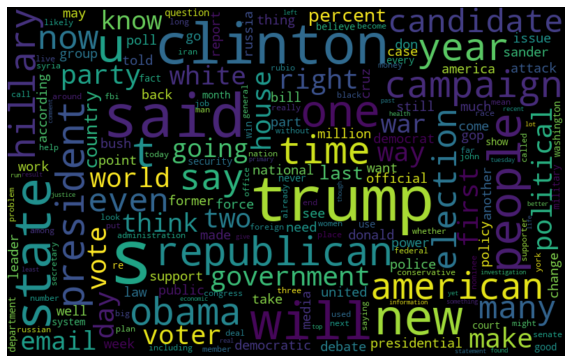

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
#We will divide our data(true and fake)

#Function to generate wordcloud to True news.

def wordcloud_true(text, column_text):
    true_text = text.query("label == 'TRUE'")
    all_words = ' '.join([text for text in true_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [59]:
#Function to generate wordcloud to Fake news.

def wordcloud_fake(text, column_text):
    fake_text = text.query("label == 'FAKE'")
    all_words = ' '.join([text for text in fake_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [63]:
#Wordcloud of the true news.

wordcloud_true(df, "article")

ValueError: We need at least 1 word to plot a word cloud, got 0.

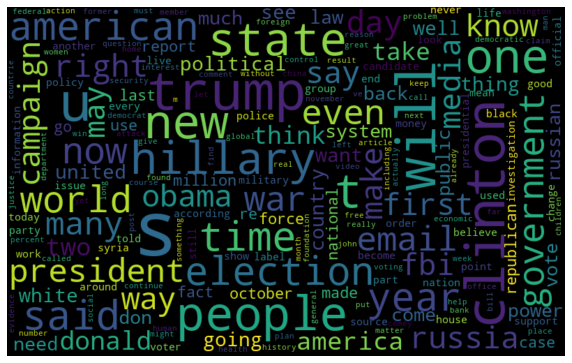

In [57]:
#Wordcloud of the fake news.

wordcloud_fake(df, "article")

In [32]:
#Now we will plot the pareto chart to better visualize the frequencies of the words.

In [64]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

In [65]:
import seaborn as sns
import nltk
    
def pareto(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.show()

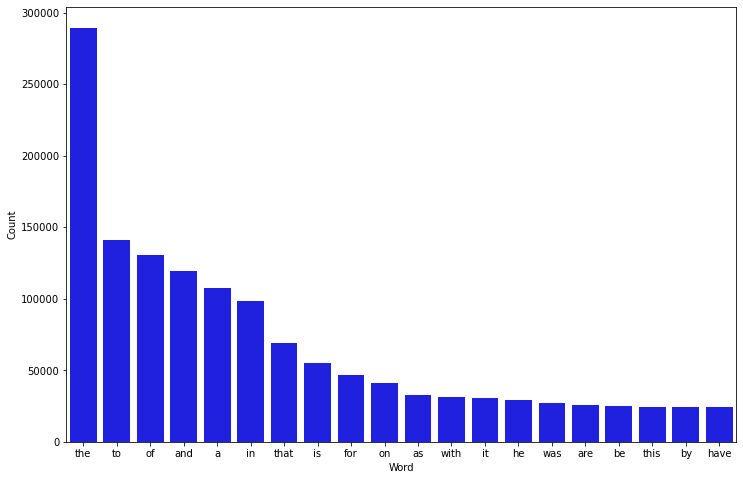

In [66]:
#The 20 more frequent words.

pareto(df, "article", 20)

In [67]:
#Lemmatization

from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in df["article"]]

df['article'] = df["article"].apply(lemmatize_text)

<ipython-input-67-89444b31ad2b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['article'] = df["article"].apply(lemmatize_text)


In [68]:
# Now We will create the BOW and the TF-IDF

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating the bag of words
bow_article = CountVectorizer().fit(df['article'])

article_vect = bow_article.transform(df['article'])

AttributeError: 'list' object has no attribute 'lower'

In [76]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(article_vect)
news_tfidf = tfidf_transformer.transform(article_vect)
print(news_tfidf.shape)

NameError: name 'article_vect' is not defined

In [71]:
#Now We will try some models.

In [75]:
#We will use 20% of the data to train the models.

from sklearn.model_selection import train_test_split
X = news_tfidf
y = df['label']

X_train, X_test, Y_train,Y_test= train_test_split(X, y, test_size=0.2)

NameError: name 'news_tfidf' is not defined

In [73]:
#Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

fakenews_detector = MultinomialNB().fit(X_train, Y_train)

NameError: name 'X_train' is not defined

In [74]:
#Model Evaluation
predictions = fakenews_detector.predict(X_test)
print(predictions)

NameError: name 'fakenews_detector' is not defined

In [43]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, predictions))

              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.94      4231
        TRUE       0.94      0.95      0.94      4749

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [44]:
#SVM

In [45]:
from sklearn.linear_model import SGDClassifier

fake_detector_svc = SGDClassifier().fit(X_train, Y_train)

In [46]:
prediction_svc = fake_detector_svc.predict(X_test)

In [47]:
print (classification_report(Y_test, prediction_svc))

              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4231
        TRUE       0.99      0.99      0.99      4749

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [48]:
#Logistic regression.

In [3]:
from sklearn.linear_model import LogisticRegression

fake_detector_logistic = LogisticRegression().fit(X_train, Y_train)
print(f'Accuracy:{round(score*100,2)}%')

NameError: name 'X_train' is not defined

In [50]:
predictions_log_reg = fake_detector_logistic.predict(X_test)
print (classification_report(Y_test, predictions_log_reg))

              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4231
        TRUE       0.99      0.99      0.99      4749

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [2]:
#Saving best model
import pickle
abc_clf = 'final_model.sav'
pickle.dump(LogisticRegression, open(model_file, 'wb'))

NameError: name 'LogisticRegression' is not defined

In [5]:
import pickle
var = input("Please enter the news text, you verify:")

#function to run for predication
def detecting_fake_news(var):
    
    #now reterving the best model for predication
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    
    return (print("The given statement is:", prediction[0]))

if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news text, you verify:ghsfgseiurhgfgbfjnvd


AttributeError: 'str' object has no attribute 'predict'